# Project Code

### Exploratory Data Analysis

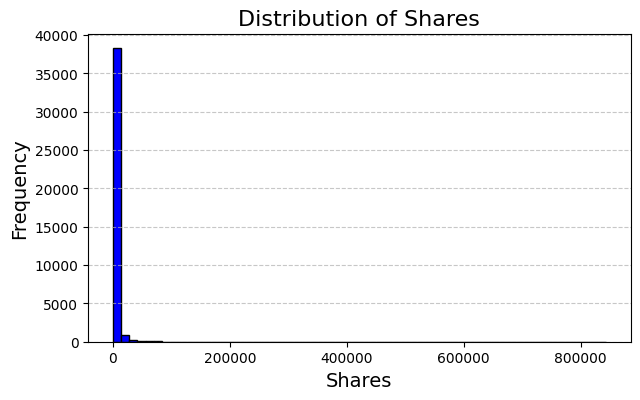

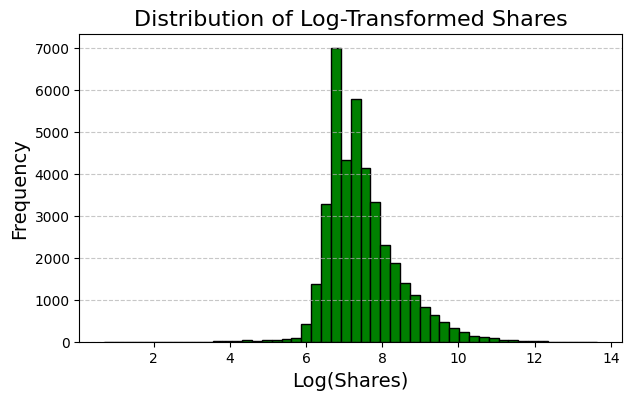

                          Feature   Coefficient
37                         LDA_00  4.780803e+01
41                         LDA_04  4.758572e+01
40                         LDA_03  4.745997e+01
38                         LDA_01  4.743783e+01
39                         LDA_02  4.735159e+01
45     global_rate_negative_words  5.559747e-01
42            global_subjectivity  4.071255e-01
46            rate_positive_words  2.800920e-01
2                 n_unique_tokens  1.855607e-01
14         data_channel_is_socmed  1.581065e-01
36                     is_weekend  1.514279e-01
56         abs_title_subjectivity  1.414184e-01
47            rate_negative_words  1.202541e-01
15           data_channel_is_tech  1.001586e-01
53          max_negative_polarity  8.373113e-02
55       title_sentiment_polarity  8.185075e-02
3                n_non_stop_words  7.966317e-02
34            weekday_is_saturday  7.756544e-02
35              weekday_is_sunday  7.386224e-02
54             title_subjectivity  5.860

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

news_data = pd.read_csv("https://richardson.byu.edu/220/OnlineNewsPopularity.csv")

#It looked like each column had a ' ' character at the beginning of each word so i strip the spaces here.
news_data.columns = news_data.columns.str.strip()

plt.figure(figsize=(7, 4))
plt.hist(news_data['shares'], bins=60, color='blue', edgecolor='black')
plt.title('Distribution of Shares', fontsize=16)
plt.xlabel('Shares', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Log transformation to make the data less skewed
news_data['shares_log'] = np.log1p(news_data['shares'])

# Transformed data
plt.figure(figsize=(7, 4))
plt.hist(news_data['shares_log'], bins=50, color='green', edgecolor='black')
plt.title('Distribution of Log-Transformed Shares', fontsize=16)
plt.xlabel('Log(Shares)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

y = news_data['shares_log']
X = pd.get_dummies(news_data.drop(['shares', 'shares_log', 'url', 'timedelta'], axis=1), drop_first=True)

# Convert categorical variables to dummy/one-hot encoding (if any exist)
X = pd.get_dummies(X, drop_first=True)

# Fit a linear regression model using sklearn
model = LinearRegression()
model.fit(X, y)

# Get coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False))

### Linear Regression Modeling

### Regression Tree Modeling

# Technical Report

### Exploratory Data Analysis
- Plotting the target variable "shares", it appears we have a heavily skewed right data set, with the majority of shares being between 0 - 1000. We do have a large amount of outliers with shares up into the 700,000 range. Because of the skew I decided to perform a log transformation to the target variable that seemed to normalize the data.

##### Positive Predictors (Higher Coefficients)
- **`LDA_00` to `LDA_04`**: These are by far the strongest predictors, with coefficients around **47.5–48.0**, indicating that the content topics drive the majority of engagement.
- **`global_rate_negative_words (0.56)`**: Articles with higher rates of negative words correlate positively with shares, suggesting controversial or emotional content drives engagement.
- **`global_subjectivity (0.41)`**: Subjective content (as opposed to objective) is another driver of shares.

##### Negative Predictors (Lower Coefficients)
- **`global_rate_positive_words (-1.14)`**: A strong negative predictor, indicating that excessive positivity may reduce engagement.
- **`n_non_stop_unique_tokens (-0.252)`**: Articles with a high proportion of unique (non-stop) words tend to perform worse, possibly because they’re harder to read.
- **`min_positive_polarity (-0.275)`**: Articles with low positive polarity values tend to perform worse, suggesting a need for balanced emotional tone.


### Linear Regression Modeling

### Regression Tree Modeling

### Conclusion